# Анализ горных пород в компании "Цифра"  
Мы работаем в компании «Цифра». Занимаемся разработкой решений для эффективной работы промышленных предприятий. Необходимо подготовить прототип модели машинного обучения, которая должна предсказать коэффициент восстановления золота из золотосодержащей руды. Для этого используем данные с параметрами добычи и очистки. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.
    
Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.
    
Предоставленная информация представляет собой три датасета с обучающей и тестовой выборками, и исходными данными. Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

    
    
____



В данной работе представлен процесс создания и проверки модели машинного обучения в целях формирования правильного бизнес-решения. Работа произведена в соответствии с инструкциями заказчика. Каждый значительный шаг сопровождается промежуточным, либо общим выводом.
  
    
    
____
    
 
    
    
Часть 1. Изучение общей информации о предоставленных датасетах
    
1. Импорт необходимых библиотек для работы с данными, загрузка датасетов
2. Изучение данных, получение общей информации
3. Оценка мультиколлинеарности признаков
4. Вывод

    
Часть 2. Работа над моделями

1. Разбиение данных
2. Масштабирование признаков
3. Обучение моделей
4. Вывод
    
Часть 3. Подготовка к расчету прибыли
    
1. Подготовка к расчету прибыли
2. Вывод
    
Часть 4. Расчет прибыли
    
1. Расчет прибыли в идеальных условиях
2. Расчет рисков и прибыли для каждого региона
3. Вывод
    
Часть 5. Общий вывод
1. Общий вывод о проделанной работе

 ## Часть 1. Изучение общей информации о предоставленных датасетах

<a id='Импорт необходимых библиотек для работы с данными, загрузка датасетов'>

### <p style="text-align:center"> Импорт необходимых библиотек для работы с данными, загрузка датасетов</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import re
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

Загружаем датасеты, проверяем вывод.

In [4]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [5]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [6]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [7]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<a id='Изучение данных, получение общей информации'></a>

### <p style="text-align:center"> Изучение данных, получение общей информации</p>

Ознакомимся с информацией, посмотрим соответствуют ли типы ячеек назначению.

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [10]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [11]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,16788.0,4.716907,2.096718e+00,0.000000e+00,3.971262,4.869346,5.821176,1.600195e+01
final.output.concentrate_pb,16788.0,9.113559,3.389495e+00,0.000000e+00,8.825748,10.065316,11.054809,1.703190e+01
final.output.concentrate_sol,16490.0,8.301123,3.825760e+00,0.000000e+00,6.939185,8.557228,10.289741,1.812485e+01
final.output.concentrate_au,16789.0,39.467217,1.391723e+01,0.000000e+00,42.055722,44.498874,45.976222,5.361137e+01
final.output.recovery,15339.0,67.213166,1.196045e+01,0.000000e+00,62.625685,67.644601,72.824595,1.000000e+02
final.output.tail_ag,16794.0,8.757048,3.634103e+00,0.000000e+00,7.610544,9.220393,10.971110,1.955215e+01
final.output.tail_pb,16677.0,2.360327,1.215576e+00,0.000000e+00,1.641604,2.453690,3.192404,6.086532e+00
final.output.tail_sol,16715.0,9.303932,4.263208e+00,0.000000e+00,7.870275,10.021968,11.648573,2.231773e+01
final.output.tail_au,16794.0,2.687512,1.272757e+00,0.000000e+00,2.172953,2.781132,3.416936,9.789625e+00
primary_cleaner.input.sulfate,15553.0,129.479789,4.538693e+01,2.567664e-06,103.064021,131.783108,159.539839,2.519999e+02


In [12]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
primary_cleaner.input.sulfate,5554.0,170.515243,49.608602,0.000103,143.340022,176.103893,207.240761,274.409626
primary_cleaner.input.depressant,5572.0,8.482873,3.353105,0.000031,6.411500,8.023252,10.017725,40.024582
primary_cleaner.input.feed_size,5856.0,7.264651,0.611526,5.650000,6.885625,7.259333,7.650000,15.500000
primary_cleaner.input.xanthate,5690.0,1.321420,0.693246,0.000003,0.888769,1.183362,1.763797,5.433169
primary_cleaner.state.floatbank8_a_air,5840.0,1481.990241,310.453166,0.000000,1497.190681,1554.659783,1601.681656,2212.432090
primary_cleaner.state.floatbank8_a_level,5840.0,-509.057796,61.339256,-799.773788,-500.455211,-499.997402,-499.575313,-57.195404
primary_cleaner.state.floatbank8_b_air,5840.0,1486.908670,313.224286,0.000000,1497.150234,1553.268084,1601.784707,1975.147923
primary_cleaner.state.floatbank8_b_level,5840.0,-511.743956,67.139074,-800.029078,-500.936639,-500.066588,-499.323361,-142.527229
primary_cleaner.state.floatbank8_c_air,5840.0,1468.495216,309.980748,0.000000,1437.050321,1546.160672,1600.785573,1715.053773
primary_cleaner.state.floatbank8_c_level,5840.0,-509.741212,62.671873,-799.995127,-501.300441,-500.079537,-499.009545,-150.937035


In [13]:
data_full.describe().T

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,22627.0,4.781559e+00,2.030128e+00,0.000000e+00,4.018525,4.953729,5.862593,1.600195e+01
final.output.concentrate_pb,22629.0,9.095308e+00,3.230797e+00,0.000000e+00,8.750171,9.914519,10.929839,1.703190e+01
final.output.concentrate_sol,22331.0,8.640317e+00,3.785035e+00,0.000000e+00,7.116799,8.908792,10.705824,1.961572e+01
final.output.concentrate_au,22630.0,4.000117e+01,1.339806e+01,0.000000e+00,42.383721,44.653436,46.111999,5.361137e+01
final.output.recovery,20753.0,6.744749e+01,1.161603e+01,0.000000e+00,63.282393,68.322258,72.950836,1.000000e+02
final.output.tail_ag,22633.0,8.923690e+00,3.517917e+00,0.000000e+00,7.684016,9.484369,11.084557,1.955215e+01
final.output.tail_pb,22516.0,2.488252e+00,1.189407e+00,0.000000e+00,1.805376,2.653001,3.287790,6.086532e+00
final.output.tail_sol,22445.0,9.523632e+00,4.079739e+00,0.000000e+00,8.143576,10.212998,11.860824,2.286175e+01
final.output.tail_au,22635.0,2.827459e+00,1.262834e+00,0.000000e+00,2.303108,2.913794,3.555077,9.789625e+00
primary_cleaner.input.sulfate,21107.0,1.402777e+02,4.991900e+01,2.567664e-06,110.177081,141.330501,174.049914,2.744096e+02


<a id='Вывод_1'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе первичного анализа данных были  сделаны следующие выводы:

___


1. Выявлены пропуски в данных. Связаны с особенностями сбора данных.

2. Возможно, данные нуждаются в масштабировании.


___

Таким образом было выполнено первичное ознакомление с предоставленной информацией, выявлены некоторые дефекты датасета. Данные нуждаются в предобработке. Разберемся с этим в следующей части.

 ## Часть 2. Подготовка данных

<a id='Проверка правильности информации'>

### <p style="text-align:center"> Проверка правильности информации </p>

Проверим, правильно ли рассчитана эффективность обогащения. Вычислим её на обучающей выборке для признака 'rougher.output.recovery'. Найдем MAE между нашими расчётами и значением признака.

Функция для расчета необходимого параметра.

In [14]:
def calc_recovery(C, F, T):
    return ((C*(F-T)) / (F*(C-T))) * 100

In [15]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

true_recovery = data_train['rougher.output.recovery']
recovery = calc_recovery(C, F, T)

У нас не получится посчитать МАЕ пока в данных присутствуют пропуски или бесконечности.

In [16]:
recovery.replace([np.inf, -np.inf], np.nan, inplace=True)
recovery = recovery.dropna()
true_recovery = true_recovery.iloc[recovery.index]

In [17]:
true_recovery = true_recovery.reset_index(drop=True)
recovery = recovery.reset_index(drop=True)

In [18]:
true_recovery.replace([np.inf, -np.inf], np.nan, inplace=True)
true_recovery = true_recovery.dropna()
recovery = recovery.iloc[true_recovery.index]

In [19]:
print(f'Средняя абсолютная ошибка получилась {mean_absolute_error(true_recovery, recovery)}, близка к нулю.')

Средняя абсолютная ошибка получилась 9.444891926100695e-15, близка к нулю.


MAE между нашими расчетами и значением признака близка к нулю, следовательно, показатель рассчитан верно.

<a id='Анализ недоступных в тестовой выборке признаков'>

### <p style="text-align:center"> Анализ недоступных в тестовой выборке признаков </p>

In [20]:
missed_features = set(data_train.columns) - set(data_test.columns)

In [21]:
missed_features

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовом датасете отсутствуют выходные параметры output на каждом из этапов процесса. Это в первую очередь концентраты и отвальные хвосты, а также эффективность обогащения. Более того, отсутствуют расчетные признаки rougher.calculation. Данные признаки не будут участвовать в обучении моделей.

<a id='Предобработка данных'>

### <p style="text-align:center"> Предобработка данных</p>

Отберём признаки, которые больше всего коррелируют с целевыми признаками final.output.recovery и rougher.output.recovery.
Удалим признаки, сильно коррелирующие с уже отобранными. Среди отобранных признаков разберемся с пропусками и аномалиями.

In [22]:
test_columns = list(data_test.columns)
test_columns = test_columns[1:]
useful_columns = ['final.output.recovery', 'rougher.output.recovery'] + test_columns

In [23]:
(data_train[useful_columns].corr().sort_values(by = 'final.output.recovery', ascending = False)
                                 .style.background_gradient(cmap = 'coolwarm'))

Выделим признаки для удаления.

In [24]:
dropped_columns = ['primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_b_air', 
                   'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_c_level',
                   'primary_cleaner.state.floatbank8_d_level', 'rougher.input.floatbank10_sulfate',
                   'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_b_air',
                   'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 
                   'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
                   'rougher.state.floatbank10_f_level', 'secondary_cleaner.state.floatbank2_a_air',
                   'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank4_b_air',
                   'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank5_b_level',
                   'rougher.state.floatbank10_b_level']

In [25]:
test_columns = [column for column in test_columns if column not in dropped_columns]
useful_columns = [column for column in useful_columns if column not in dropped_columns]

Удалим ненужные признаки.

In [26]:
data_train = data_train.drop(dropped_columns, axis = 1)
data_test = data_test.drop(dropped_columns, axis = 1)

Пропущенные значения заполним значениями из соседних ячеек.

In [27]:
data_train = data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')

<a id='Вывод_2'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе подготовки данных были  сделаны следующие выводы:

___


1. Проверили расчет эффективности обогащения, он верен.

2. В тестовом датасете отсутствуют параметры output и расчетные признаки rougher.calculation. Данные признаки не будут участвовать в обучении моделей.

3. Выявлены и удалены избыточные для обучения моделей признаки.

4. Для оставшихся признаков пропуски были заполнены ближайшими имеющимися значениями.


___

Таким образом была выполнена подготовка предоставленной информации, выявленные дефекты устранены. Переходим к анализу данных.

 ## Часть 3. Анализ данных

<a id='Изменение концентрации металлов'></a>

### <p style="text-align:center"> Изменение концентрации металлов </p>

In [28]:
data_train = data_train.set_index('date')
data_train = data_train.set_index(pd.DatetimeIndex(data_train.index))
data_test = data_test.set_index('date')
data_test = data_test.set_index(pd.DatetimeIndex(data_test.index))
data_full = data_full.set_index('date')
data_full = data_full.set_index(pd.DatetimeIndex(data_full.index))

In [29]:
metal_con = np.array([['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'],
                      ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'],
                      ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
                    )

In [30]:
def plot_metal_con(cols, label):
    sns.set()
    f, axes = plt.subplots(1, 1, figsize=(18, 6))
    axes.set_title(label, fontsize=18)
    axes.set_ylabel('Concentration', fontsize=16)
    sns.lineplot(data=data_train[cols].groupby(data_train.index.floor('D')).mean())

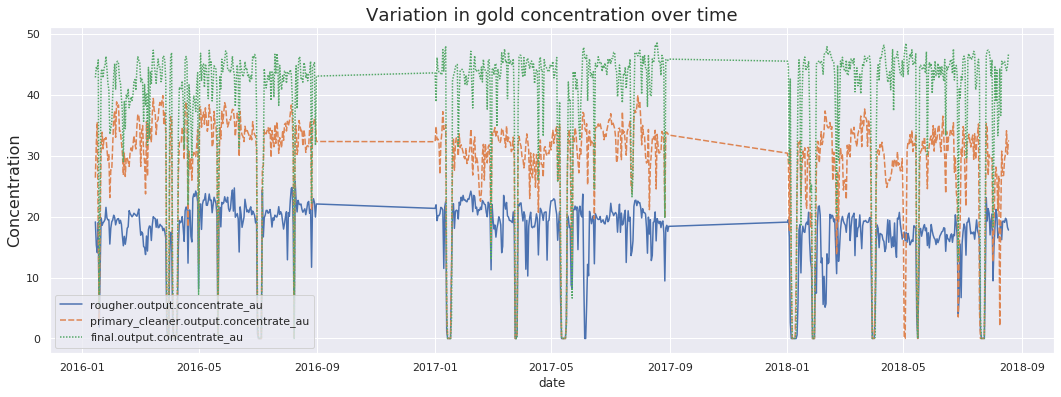

In [31]:
plot_metal_con(metal_con[0], 'Variation in gold concentration over time')

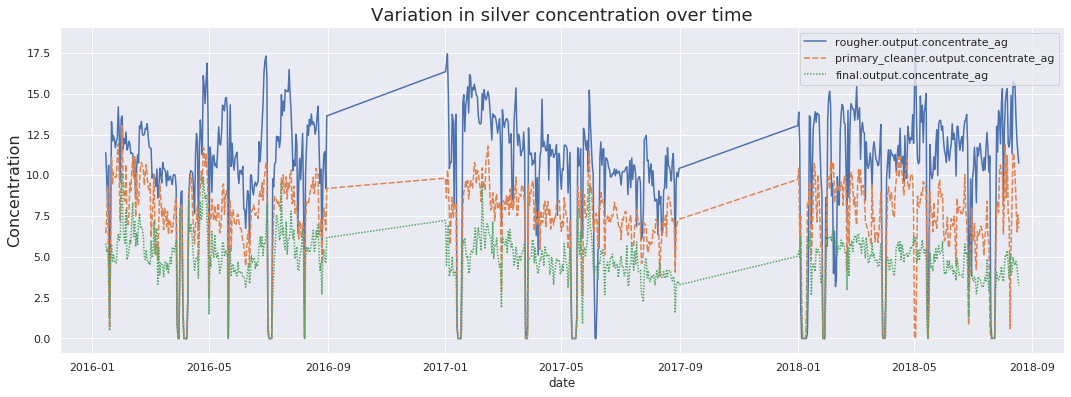

In [32]:
plot_metal_con(metal_con[1], 'Variation in silver concentration over time')

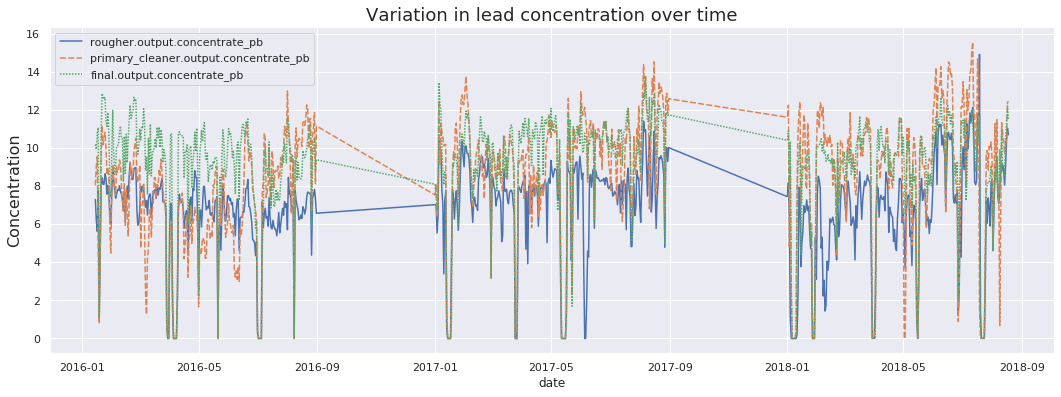

In [33]:
plot_metal_con(metal_con[2], 'Variation in lead concentration over time')

Концентрация золота на каждом этапе очистки увеличивается. Концентрация серебра наоборот - с каждым этапом очистки падает. Концентрация свинца увеличивается после флотации, но потом не растет.

В местах, где графики падают в ноль возможно потеряна информация, либо она не там собирается вовсе.

Рассмотрим каждый этап очистки.

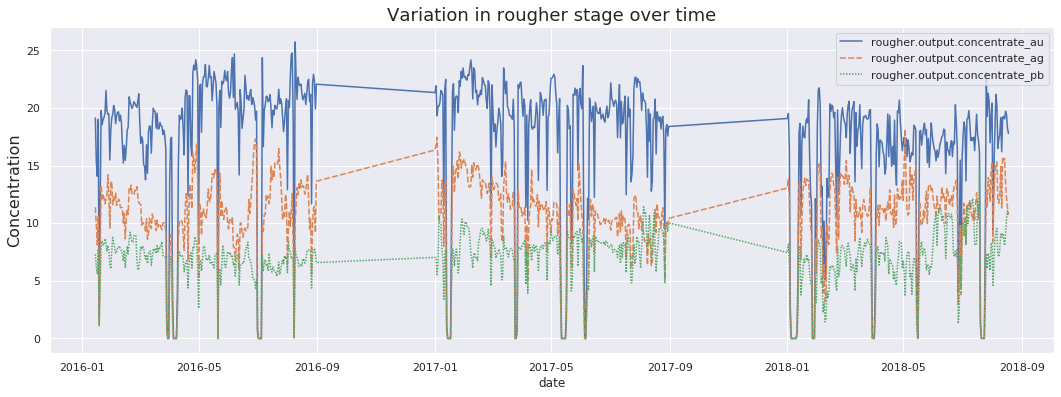

In [34]:
plot_metal_con(metal_con[:, 0], 'Variation in rougher stage over time')

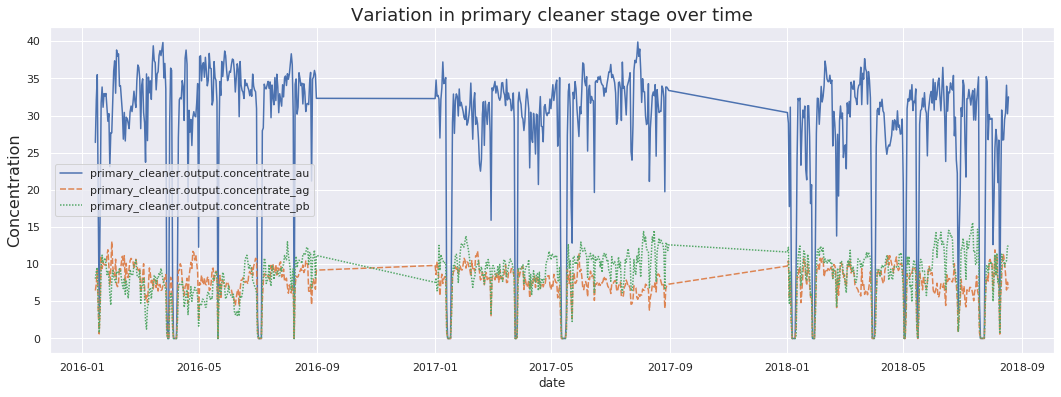

In [35]:
plot_metal_con(metal_con[:, 1], 'Variation in primary cleaner stage over time')

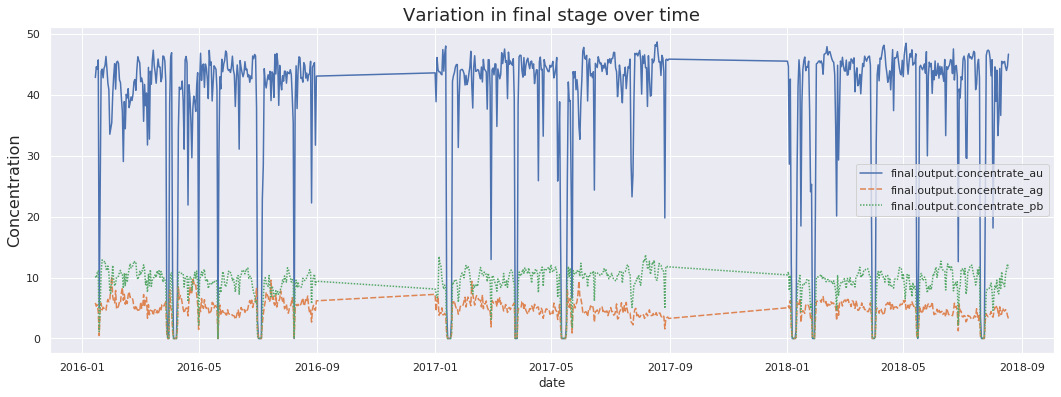

In [36]:
plot_metal_con(metal_con[:, 2], 'Variation in final stage over time')

С каждым этапом очистки растет концентрация золота. Также увеличивается концентрация относительно других металлов.

<a id='Сравнение распределения размеров гранул сырья'></a>

### <p style="text-align:center"> Сравнение распределения размеров гранул сырья </p>

In [37]:
train_feed_size = data_train['rougher.input.feed_size'].groupby(data_train.index.floor('D')).agg('mean')
test_feed_size = data_test['rougher.input.feed_size'].groupby(data_test['rougher.input.feed_size'].index.floor('D')).agg('mean')

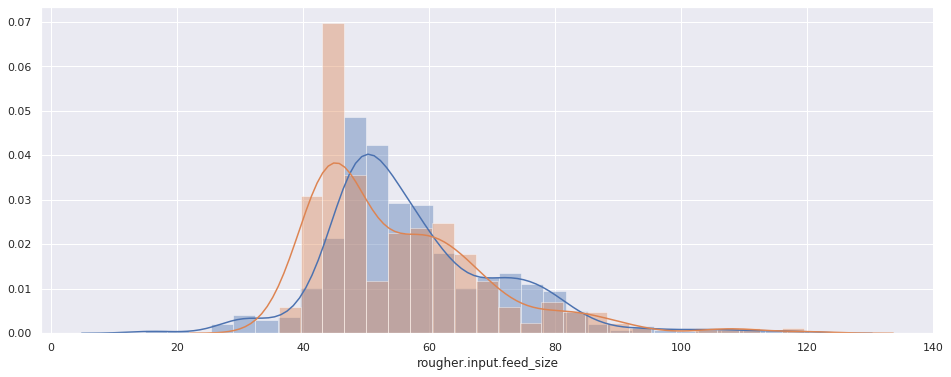

In [38]:
f, axes = plt.subplots(1, 1, figsize=(16, 6))
sns.distplot(train_feed_size.loc[train_feed_size < 150], bins=30)
sns.distplot(test_feed_size.loc[test_feed_size < 150], bins=24)

На графике видно, что распределения выборок отличаюстя не сильно. 

Проверим гипотезу о том, что выборки не имеют статистической значимости с помощью t-теста. 

Нулевая гипотеза Н0 будет звучать как:
"Значения размера гранул в обучающей выборке и тестовой выборке одинаковы".
Тогда альтернативная гипотеза H1:
"Значения размера гранул в обучающей выборке и тестовой выборке различны".

Определим уровень значимости alpha = 0.05.

In [39]:
alpha = 0.05

In [40]:
results = st.ttest_ind(train_feed_size, test_feed_size, equal_var=True)
if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута.')
else:
    print('Нулевая гипотеза подтверждена.')

Нулевая гипотеза отвергнута.


Будем пробовать убрать выбросы и посчитать pvalue еще раз.

In [41]:
data_train_75 = data_train['rougher.input.feed_size'].quantile(0.75)
data_train_25 = data_train['rougher.input.feed_size'].quantile(0.25)
data_test_75 = data_test['rougher.input.feed_size'].quantile(0.75)
data_test_25 = data_test['rougher.input.feed_size'].quantile(0.25)
data_train_min = data_train_25 - 3 * (data_train_75 - data_train_25)
data_train_max = data_train_75 + 3 * (data_train_75 - data_train_25)
data_test_min = data_test_25 - 3 * (data_test_75 - data_test_25)
data_test_max = data_test_75 + 3 * (data_test_75 - data_test_25)

In [42]:
results = st.ttest_ind(train_feed_size.loc[(train_feed_size > data_train_min) & (train_feed_size < data_train_max)],
                       test_feed_size.loc[(test_feed_size > data_train_min) & (test_feed_size > data_train_min)],equal_var=True)
if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута.')
else:
    print('Нулевая гипотеза подтверждена.')

Нулевая гипотеза подтверждена.


Делаем вывод, что распределения размеров гранул сырья на обучающей и тестовой выборках не сильно отличаются друг от друга, оценка модели будет корректной.

<a id='Исследование суммарных концентраций веществ на разных стадиях'></a>

### <p style="text-align:center"> Исследование суммарных концентраций веществ на разных стадиях </p>

Рассчитаем и визуализируем суммарные концентрации веществ на разных стадиях, поищем аномалии.

In [43]:
data_train['feed_concentrate'] = data_train['rougher.input.feed_ag'] + data_train['rougher.input.feed_pb'] +\
                                  data_train['rougher.input.feed_sol'] + data_train['rougher.input.feed_au']
data_train['rougher_concentrate'] = data_train['rougher.output.concentrate_ag'] + data_train['rougher.output.concentrate_pb'] +\
                                     data_train['rougher.output.concentrate_sol'] + data_train['rougher.output.concentrate_au']
data_train['final_concentrate'] = data_train['final.output.concentrate_ag'] + data_train['final.output.concentrate_pb'] +\
                                   data_train['final.output.concentrate_sol'] + data_train['final.output.concentrate_au']

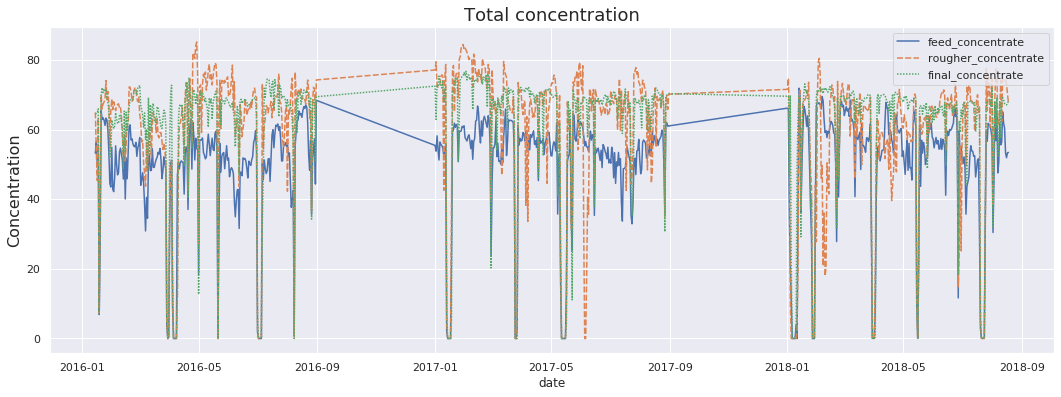

In [44]:
sum_concentrate = ['feed_concentrate', 'rougher_concentrate', 'final_concentrate']
plot_metal_con(sum_concentrate, 'Total concentration')

Выявили аномальные значения - нулевые пики. Попробуем от них избавиться. Удалим строки в которых значения меньше 40.

In [45]:
data_train = data_train.loc[(data_train['feed_concentrate'] > 40) & 
                            (data_train['rougher_concentrate'] > 40) & 
                            (data_train['final_concentrate'] > 40)]

Рассмотрим суммарные концентрации веществ после удаления аномальных значений.

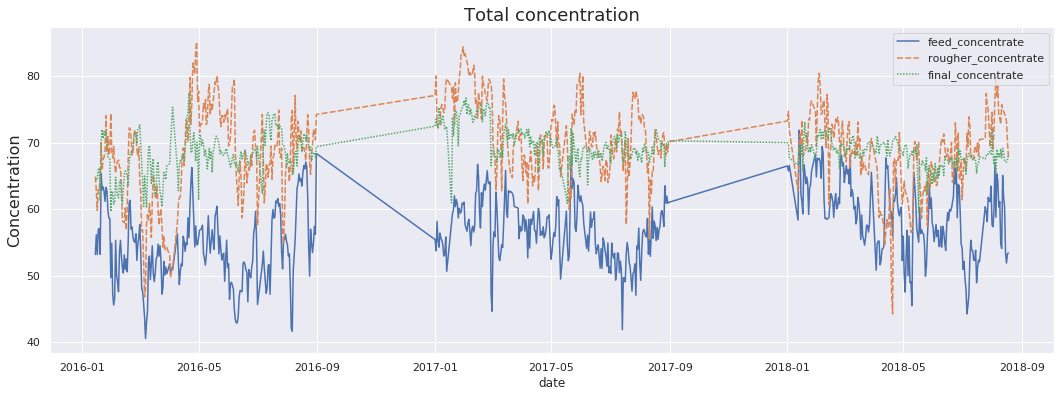

In [46]:
plot_metal_con(sum_concentrate, 'Total concentration')

In [47]:
data_train = data_train.drop(sum_concentrate, axis = 1)
data_train.reset_index(level=0, inplace=True)

<a id='Вывод_3'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе анализа данных были  сделаны следующие выводы:

___


1. Провели изменения концентрации металлов, выявили аномалии - падения до 0.

2. Рассмотрены распределения размеров гранул сырья на обучающей и тестовой выборках. Двусторонний t-test показал, что распределения не имеют статистически важных различий при уровне значимости 0.05, .

3. Визуализируя суммарные концентрации веществ на разных стадиях, подтвердили наличие аномалий. Все объекты с суммарной концентрацией меньше 30 были удалены из тренировочной выборки.

___

Таким образом был выполнен анализ предоставленной информации. Переходим к постоению моделей.

 ## Часть 4. Постоение моделей

<a id='Функция sMAPE'></a>

### <p style="text-align:center"> Функция sMAPE </p>

Напишем функции для вычисления итогового значения sMAPE.

In [48]:
def get_smape(true, predict):
    return 1 / len(true) * sum( abs(true - predict) / ( (abs(true) + abs(predict)) * 0.5) ) * 100

In [49]:
def get_final_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

<a id='Обучение моделей'></a>

### <p style="text-align:center"> Обучение моделей </p>

На этапе флотации нас будут интересовать только признаки rougher.

In [50]:
features_rougher = []
pattern = re.compile('rougher')
for column in list(data_test.columns):
    if re.match(pattern, column):
        features_rougher.append(column)

In [51]:
X_rougher = data_train[features_rougher]
X_final = data_train[test_columns]
y_rougher = data_train['rougher.output.recovery']
y_final = data_train['final.output.recovery']
test_rougher = data_test[features_rougher]
test_final = data_test[test_columns]

Проведем масштабирование признаков.

In [52]:
scaler_rougher = StandardScaler()
scaler_final = StandardScaler()
scaler_rougher.fit(X_rougher)
scaler_final.fit(X_final)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
X_rougher = pd.DataFrame(scaler_rougher.transform(X_rougher), columns = features_rougher)
X_final = pd.DataFrame(scaler_final.transform(X_final), columns = test_columns)

In [54]:
test_final_index = data_test.index
test_rougher_index = test_rougher.index
test_rougher = pd.DataFrame(scaler_rougher.transform(test_rougher), columns = features_rougher, index = test_rougher_index)
test_final = pd.DataFrame(scaler_final.transform(data_test), columns = test_columns, index = test_final_index)

Обучим модель <b>линейной регрессии</b>. Сделаем это отдельно для этапа флотации и финального этапа.

In [55]:
LR_rougher = LinearRegression()

smape_LR_rougher = cross_val_score(LR_rougher, X_rougher, y_rougher, 
                                 scoring = make_scorer(get_smape),
                                 cv = 5,
                                 n_jobs = -1).mean()

In [56]:
LR_final = LinearRegression()

smape_LR_final = cross_val_score(LR_final, X_final, y_final, 
                                 scoring = make_scorer(get_smape),
                                 cv = 5,
                                 n_jobs = -1).mean()

In [57]:
print('Linear regression:')
print('sMAPE rougher: {:.2f} %'.format(smape_LR_rougher))
print('sMAPE final: {:.2f} %'.format(smape_LR_final))
print('Total sMAPE: {:.2f} %'.format(get_final_smape(smape_LR_rougher, smape_LR_final)))

Linear regression:
sMAPE rougher: 6.81 %
sMAPE final: 10.44 %
Total sMAPE: 9.53 %


Теперь обучим модель <b>случайного леса</b>. Сделаем это отдельно для этапа флотации и финального этапа. Используем GridSearchCV для подбора параметров, используя кросс-валидацию.

In [58]:
parameters = { 'n_estimators': range (10, 21, 10),
               'max_depth': range (2, 5),
               'min_samples_leaf': range (2, 4),
               'min_samples_split': range (2, 3, 2)
             }

In [59]:
RF_rougher = RandomForestRegressor()

GS_rougher = GridSearchCV(estimator = RF_rougher, 
                        param_grid = parameters, 
                        cv = 5, 
                        n_jobs = -1, 
                        verbose = 2, 
                        scoring = make_scorer(get_smape))
GS_rougher.fit(X_rougher, y_rougher)

print(GS_rougher.best_params_)
print('sMAPE rougher: {:.2f} %'.format(GS_rougher.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.3s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.3s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.3s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.3s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.3s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.5s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   0.5s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   32.8s finished


{'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 20}
sMAPE rougher: 6.89 %


In [60]:
RF_final = RandomForestRegressor()

GS_final = GridSearchCV(estimator = RF_final, 
                        param_grid = parameters, 
                        cv = 5, 
                        n_jobs = -1, 
                        verbose = 2, 
                        scoring = make_scorer(get_smape))
GS_final.fit(X_final, y_final)

print(GS_final.best_params_)
print('sMAPE rougher: {:.2f} %'.format(GS_final.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.6s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.6s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.6s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.6s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, total=   0.6s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   1.7s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20, total=   1.7s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=20

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.4min finished


{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 20}
sMAPE rougher: 9.29 %


Используя найденные с помощью GridSeachCV параметры, обучим модели случайного леса.

In [61]:
RF_rougher = RandomForestRegressor(max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=10)

smape_RF_rougher = cross_val_score(RF_rougher, X_rougher, y_rougher, 
                                   scoring = make_scorer(get_smape),
                                   cv = 5,
                                   n_jobs = -1).mean()

In [62]:
RF_final = RandomForestRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=10)

smape_RF_final = cross_val_score(RF_final, X_final, y_final, 
                                 scoring = make_scorer(get_smape),
                                 cv = 5,
                                 n_jobs = -1).mean()

In [63]:
print('Random Forest:')
print('sMAPE rougher: {:.2f} %'.format(smape_RF_rougher))
print('sMAPE final: {:.2f} %'.format(smape_RF_final))
print('Total sMAPE: {:.2f} %'.format(get_final_smape(smape_RF_rougher, smape_RF_final)))

Random Forest:
sMAPE rougher: 6.85 %
sMAPE final: 9.04 %
Total sMAPE: 8.50 %


<a id='Тестирование моделей'></a>

### <p style="text-align:center"> Тестирование моделей </p>

In [64]:
y_true_rougher = data_full.loc[data_test.index, 'rougher.output.recovery'].dropna()
y_true_final = data_full.loc[data_test.index, 'final.output.recovery'].dropna()
test_rougher = test_rougher.loc[y_true_rougher.index]
test_final = test_final.loc[y_true_final.index]

Протестируем модели с уже подобранными параметрами.

In [65]:
RF_rougher = RandomForestRegressor(max_depth=2, min_samples_leaf=3, min_samples_split=2, n_estimators=10)
RF_rougher.fit(X_rougher, y_rougher)
predict_rougher = RF_rougher.predict(test_rougher)

In [66]:
RF_final = RandomForestRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=10)
RF_final.fit(X_final, y_final)
predict_final = RF_final.predict(test_final)

In [67]:
print('sMAPE rougher test: {:.2f} %'.format(get_smape(y_true_rougher, predict_rougher)))
print('sMAPE final test:  {:.2f} %'.format(get_smape(y_true_final, predict_final)))
smape_final = get_final_smape(get_smape(y_true_rougher, predict_rougher), get_smape(y_true_final, predict_final))
print('Total sMAPE test: {:.2f} %'.format(smape_final))

sMAPE rougher test: 9.61 %
sMAPE final test:  10.45 %
Total sMAPE test: 10.24 %


Сравним полученную модель с дамми моделью.

In [68]:
dummy_pred_rougher = np.array([data_train['rougher.output.recovery'].mean() for _ in range(len(y_true_rougher))])
dummy_pred_final = np.array([data_train['final.output.recovery'].mean() for _ in range(len(y_true_final))])

In [69]:
print('Constant model:')
print('sMAPE rougher constant model: {:.2f} %'.format(get_smape(y_true_rougher, dummy_pred_rougher)))
print('sMAPE final constant model:  {:.2f} %'.format(get_smape(y_true_final, dummy_pred_final)))
smape_dummy = get_final_smape(get_smape(y_true_rougher, dummy_pred_rougher), get_smape(y_true_final, dummy_pred_final))
print('Total sMAPE constant model: {:.2f} %'.format(smape_dummy))

Constant model:
sMAPE rougher constant model: 9.12 %
sMAPE final constant model:  10.86 %
Total sMAPE constant model: 10.42 %


In [70]:
data = {'model': ['Linear Regression', 'Random Forest', 'Dummy Model', 'Test'], 
        'sMAPE rougher':[smape_LR_rougher, smape_RF_rougher,get_smape(y_true_rougher, dummy_pred_rougher),
                         get_smape(y_true_rougher, predict_rougher)],
        'sMAPE final':[smape_LR_final, smape_RF_final, get_smape(y_true_final, dummy_pred_final),
                       get_smape(y_true_final, predict_final)], 
        'Total sMAPE':[get_final_smape(smape_LR_rougher, smape_LR_final), get_final_smape(smape_RF_rougher, smape_RF_final),
                       smape_dummy, smape_final],
       }
summary = pd.DataFrame(data=data).round(3)

<a id='Вывод_4'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе создания моделей были  сделаны следующие выводы:

___


1. Написали функцию для расчета sMAPE.

2. Обучены модели линейной регрессии и случайного леса. Обучали отдельно для флотации и после очистки. Параметры подбирали с помощью GridSearchCV. Лучшая модель - случайный лес.

3. Создали дамми модель и проверили адекватность нашей модели.

___

Таким образом было выполнено создание моделей. Переходим к выводам.

 ## Часть 5. Общий вывод

<a id='Вывод_5'></a>

### <p style="text-align:center"> Вывод по проделанной работе </p>

##### В ходе работы мы:

___


1. <a href='#Вывод_1'>Изучили</a> общую информацию о предоставленных датасетах. Проблем на данном этапе практически не нашли.


2. <a href='#Вывод_2'>Подготовили</a> данные - проверили правильность расчета эффективности обогащения, проанализировали признаки, недоступные в тестовой выборке, провели предобработку. Эффективность обогащения расчитана правильно, отобраны признаки, избыточные для моделей, заполнили пропущенные значения.


3. <a href='#Вывод_3'>Проанализировали</a> концентрации металлов, а также суммарные концентрации веществ на всех стадиях очистки. Рассмотрены распределения гранул сырья на входе технологического процесса для обучающего и тестового датасетов. Двусторонний t-test показал, что распределения не сильно отличаются друг от друга при уровне значимости 0.05. Выявили аномальные значения, значения с суммарной концентрацией смеси меньше 40 были удалены.


4. <a href='#Вывод_4'> Написали </a> функцию для расчета sMAPE. Обучили модели и оценили их качество кросс-валидацией. Метрика sMAPE на обученной модели на 0.25% ниже, чем на константной модели.


___



Таким образом была выполнена работа по анализу и формированию выводов на основе имеющейся информации. Для наглядности все сведено в таблицу ниже.

In [71]:
summary

,model,sMAPE rougher,sMAPE final,Total sMAPE
0,Linear Regression,6.813,10.442,9.535
1,Random Forest,6.853,9.044,8.496
2,Dummy Model,9.115,10.855,10.420
3,Test,9.606,10.455,10.242
